# Определение рыночной стоимости автомобиля с пробегом

Сервис по продаже автомобилей с пробегом разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. 

**Задача:** построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

### План проекта

<br>[1. Загрузка и подготовка данных](#step1)
    <br>[1.1 Загрузка данных](#step2)
    <br>[1.2 Промежуточный вывод](#step3)
    <br>[1.3 Подготовка данных](#step4)
    <br>[1.4 Вывод к этапу 1](#step5)
<br>[2. Обучение моделей](#step6)
    <br>[2.1 Вывод к этапу 2](#step7)
<br>[3. Анализ моделей](#step8)
<br>[4.Общий вывод](#step9)

# 1. Загрузка и подготовка данных<a id='step1'></a>

## 1.1 Загрузка данных <a id='step2'></a>

In [1]:
#Прежде всего импортирую нужные на этом этапе библиотеки
import pandas as pd #Импортирую библиотеку pandas
%matplotlib inline
import matplotlib.pyplot as plt #Импортирую библиотеку matplotlib
import seaborn as sns #Импортирую библиотеку seaborn
import numpy as np #Импортирую библиотеку высокоуровневых математических функций numpy

#Читаю файл с данными
data = pd.read_csv('/datasets/autos.csv') 
#Печатаю первые 10 строк таблицы для ознакомления с данными
display(data.head(10))
#Получаю информацию о датасете
data.info()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB


## 1.2 Промежуточный вывод<a id='step3'></a>
На этом этапе проедена загрузка данных и изучение общей информации.
<br>Для анализа данных и построения модели предоставлен датасет, содержащий информацию о технических характеристиках, комплектациях и ценах автомобилей, которые размещались на площадке сервиса  «Не бит, не крашен» для продажи. Датасет состоит из 16 столбцов с данными и 354369 строк.

<br>**Датафрейм состоит из следующих столбцов:**
<br>**Признаки** 
<br>• DateCrawled — дата скачивания анкеты из базы
<br>• VehicleType — тип автомобильного кузова
<br>• RegistrationYear — год регистрации автомобиля
<br>• Gearbox — тип коробки передач
<br>• Power — мощность (л. с.)
<br>• Model — модель автомобиля
<br>• Kilometer — пробег (км)
<br>• RegistrationMonth — месяц регистрации автомобиля
<br>• FuelType — тип топлива
<br>• Brand — марка автомобиля
<br>• NotRepaired — была машина в ремонте или нет
<br>• DateCreated — дата создания анкеты
<br>• NumberOfPictures — количество фотографий автомобиля
<br>• PostalCode — почтовый индекс владельца анкеты (пользователя)
<br>• LastSeen — дата последней активности пользователя
<br>**Целевой признак**
<br>• Price — цена (евро)

Пропуски данных имеются в столбцах *'VehicleType', 'Gearbox', 'Model', 'FuelType', 'NotRepaired'*. Для обучения моделей требуется подготовка данных.

## 1.3 Подготовка данных <a id='step4'></a>

Сперва разберемся с пропусками данных. Начнем со столбца *'Model'*, взглянем на данные.

In [2]:
print(data['Model'].unique())

['golf' nan 'grand' 'fabia' '3er' '2_reihe' 'other' 'c_max' '3_reihe'
 'passat' 'navara' 'ka' 'polo' 'twingo' 'a_klasse' 'scirocco' '5er'
 'meriva' 'arosa' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio'
 'kadett' 'kangoo' 'corsa' 'one' 'fortwo' '1er' 'b_klasse' 'signum'
 'astra' 'a8' 'jetta' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter' '156'
 'escort' 'forester' 'xc_reihe' 'scenic' 'a4' 'a1' 'insignia' 'combo'
 'focus' 'tt' 'a6' 'jazz' 'omega' 'slk' '7er' '80' '147' '100' 'z_reihe'
 'sportage' 'sorento' 'v40' 'ibiza' 'mustang' 'eos' 'touran' 'getz' 'a3'
 'almera' 'megane' 'lupo' 'r19' 'zafira' 'caddy' 'mondeo' 'cordoba' 'colt'
 'impreza' 'vectra' 'berlingo' 'tiguan' 'i_reihe' 'espace' 'sharan'
 '6_reihe' 'panda' 'up' 'seicento' 'ceed' '5_reihe' 'yeti' 'octavia' 'mii'
 'rx_reihe' '6er' 'modus' 'fox' 'matiz' 'beetle' 'c1' 'rio' 'touareg'
 'logan' 'spider' 'cuore' 's_max' 'a2' 'galaxy' 'c3' 'viano' 's_klasse'
 '1_reihe' 'avensis' 'roomster' 'sl' 'kaefer' 'santa' 'cooper' 'leon'
 '4

Среди значений столбца *'Model'* имеются такие как **other**. Используем их для заполнения пропусков в этом столбце. 

In [3]:
#Заполняю пропуски в столбце 'Model'
data['Model'] = data['Model'].fillna('other')

Оценим данные в других столбцах.

In [4]:
print(data['Gearbox'].value_counts())
print(data['NotRepaired'].value_counts())
print(data['FuelType'].value_counts())
print(data['VehicleType'].value_counts())

manual    268251
auto       66285
Name: Gearbox, dtype: int64
no     247161
yes     36054
Name: NotRepaired, dtype: int64
petrol      216352
gasoline     98720
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: FuelType, dtype: int64
sedan          91457
small          79831
wagon          65166
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: VehicleType, dtype: int64


Пропуски данных в столбцах *'Gearbox'* и *'NotRepaired'* заполним новой категорией 'unknown'.

In [92]:
#data['Gearbox'] = data['Gearbox'].fillna(list(data['Gearbox'].mode())[0])
#data['NotRepaired'] = data['NotRepaired'].fillna(list(data['NotRepaired'].mode())[0])

data['Gearbox'] = data['Gearbox'].fillna('unknown')
data['NotRepaired'] = data['NotRepaired'].fillna('unknown')

Для заполнения пропусков в столбцах *'VehicleType'* и *'FuelType'* используем данные из других строк с таким же значением в столбце *'Model'*.

In [93]:
#Объяыляю функцию для заполнения пропусков в столбцах, на вход она принимает датафрейм, 
#столбец с моделями авто и стобец, который нужно заполнить
def type_filling_func(dataframe, model_column, type_column):
    model_list = list(dataframe[model_column].unique())
    type_list = []
    for i in model_list:
        type_list.append(list(dataframe.loc[dataframe.loc[:,model_column] == i][type_column].mode())[0])
    model_dict = dict(zip(model_list, type_list))
    
    for i in model_dict:
        dataframe.loc[dataframe.loc[:,model_column] == i] = dataframe.loc[dataframe.loc[:,model_column] == i].fillna(model_dict[i])

In [94]:
#Применяю функцию
type_filling_func(data, 'Model', 'VehicleType')
type_filling_func(data, 'Model', 'FuelType')

Оценим результат заполнения пропусков.

In [95]:
data.info()
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          354369 non-null object
RegistrationYear     354369 non-null int64
Gearbox              354369 non-null object
Power                354369 non-null int64
Model                354369 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             354369 non-null object
Brand                354369 non-null object
NotRepaired          354369 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,sedan,1993,manual,0,golf,150000,0,petrol,volkswagen,unknown,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,other,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,unknown,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,sedan,volkswagen,unknown,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


Теперь ознакомимся с распределением данных в столбцах с данными типа **int64**.

In [96]:
#Создаем список столбцов с данными типа int64
numeric = []
for i in data.columns:
    if data[i].dtypes == 'int64':
        numeric.append(i)

print(numeric)

['Price', 'RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth', 'NumberOfPictures', 'PostalCode']


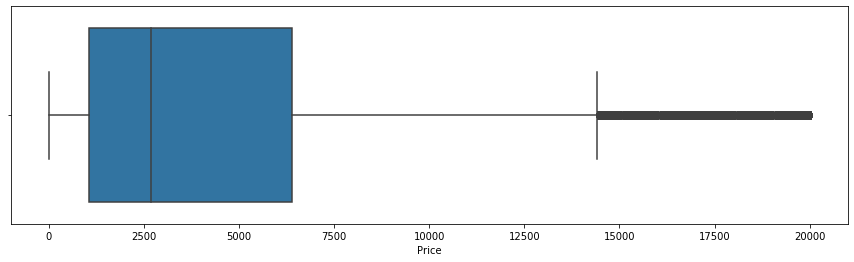

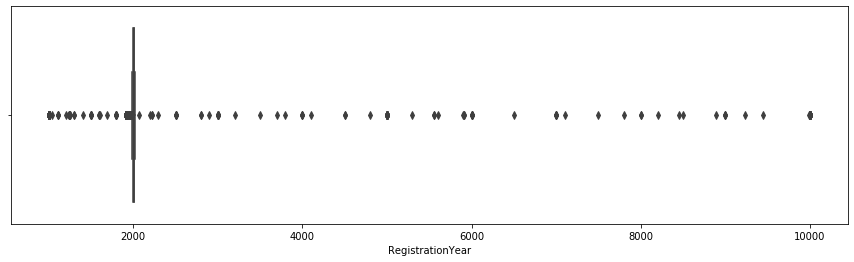

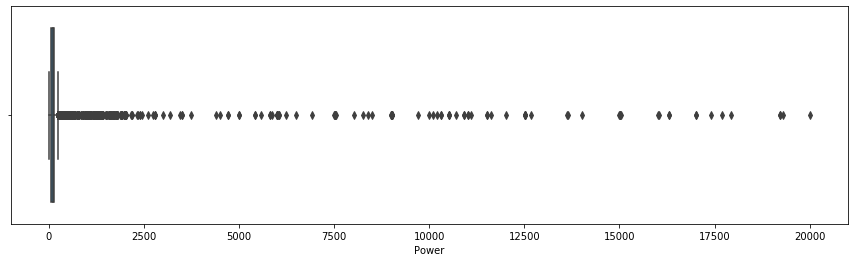

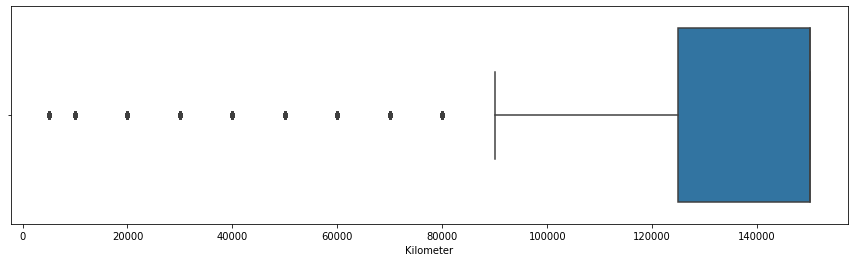

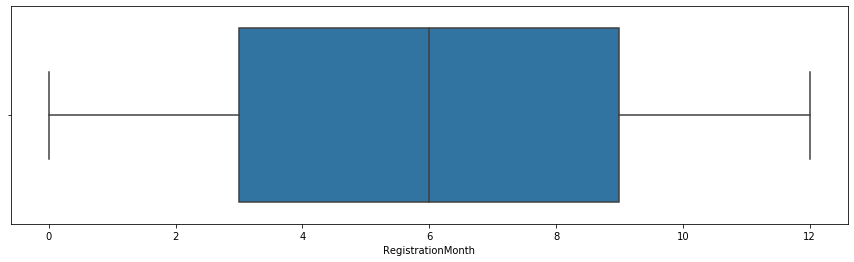

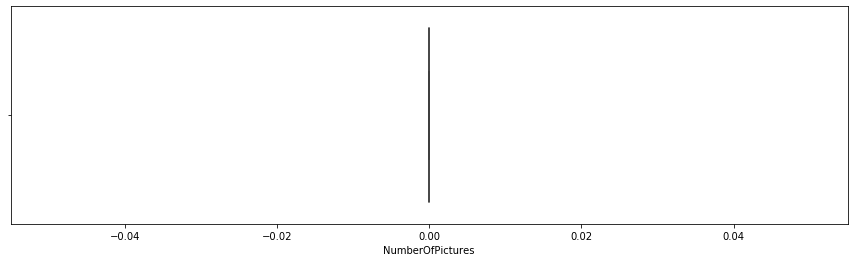

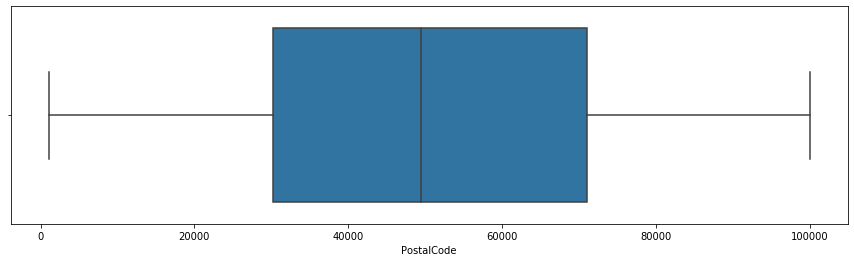

In [97]:
#Строю диаграммы размаха (aka "Ящик с усами") по столбцам с данными типа int64
for i in numeric:
    plt.figure(figsize=(15, 4))
    sns.boxplot(y=i, data=data, orient="h")

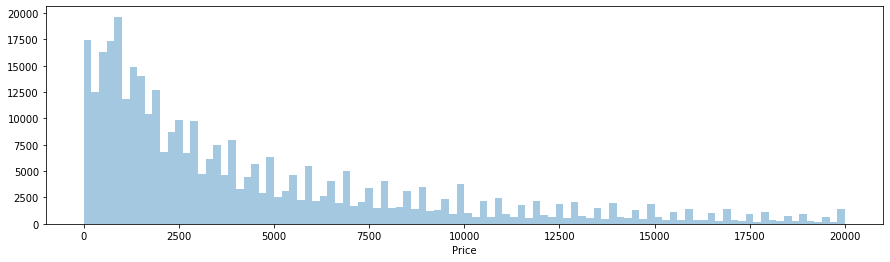

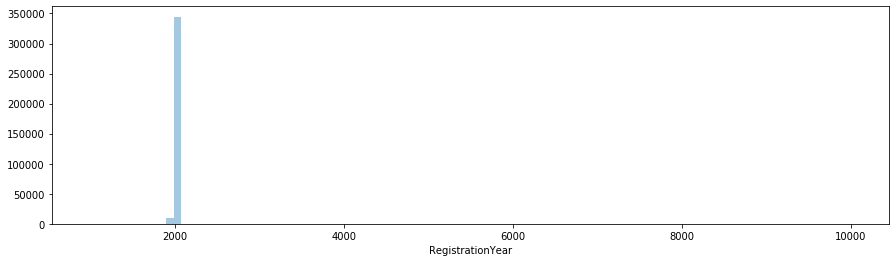

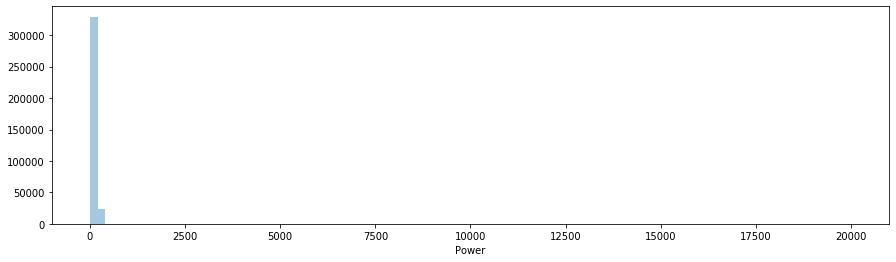

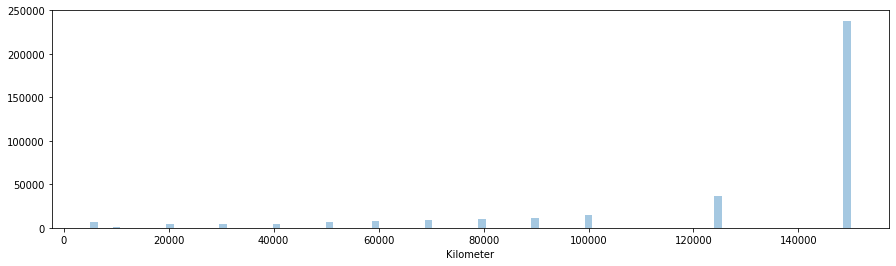

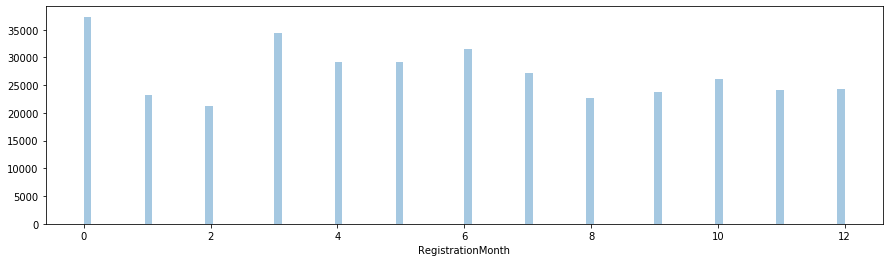

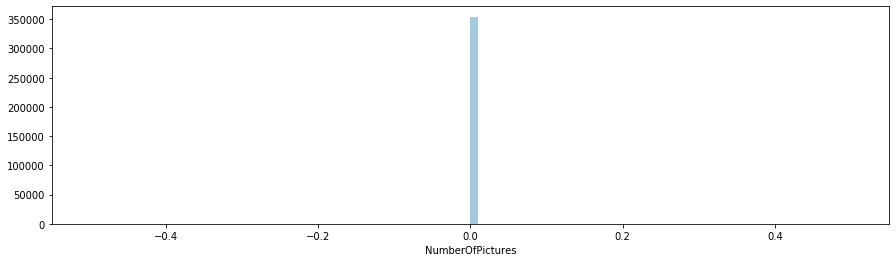

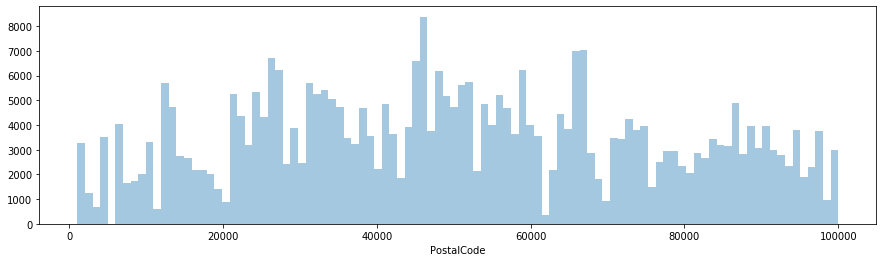

In [98]:
#Строю гистограммы по столбцам с данными типа int64
for i in numeric:
    plt.figure(figsize=(15, 4))
    sns.distplot(data[i], kde=False, bins=100)

In [99]:
print(sorted(data['RegistrationYear'].unique()))
print()
print(data['Power'].describe())
print()
print(data['Price'].describe())

[1000, 1001, 1039, 1111, 1200, 1234, 1253, 1255, 1300, 1400, 1500, 1600, 1602, 1688, 1800, 1910, 1915, 1919, 1920, 1923, 1925, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2066, 2200, 2222, 2290, 2500, 2800, 2900, 3000, 3200, 3500, 3700, 3800, 4000, 4100, 4500, 4800, 5000, 5300, 5555, 5600, 5900, 5911, 6000, 6500, 7000, 7100, 7500, 7800, 8000, 8200, 8455, 8500, 8888, 9000, 9229, 9450, 9996, 9999]

count    354369.000000
mean        110.094337
std         189.850405
min           0.000000


Из описаний столбцов, боксплотов и гистограмм видно, что в столбцах *'Price', 'RegistrationYear', 'Power'* есть аномальные значения. Например, нулевые и близкие к нулю значения в столбцах *'Power'* и *'Price'*, в столбце *'RegistrationYear'* также обнаружены аномальные значения.

Чтобы точнее определеить верхнюю границу для столбца *'RegistrationYear'*, найдем самую позднюю дату в столбце *'DateCreated'*.

In [100]:
data['DateCreated'] = pd.to_datetime(data['DateCreated'], format='%Y-%m-%d')
print(data['DateCreated'].max())
print(data['DateCreated'].dt.year.max())

2016-04-07 00:00:00
2016


Итак, удалим аномальные значения из датасета. Оставим автомобили с регистрацией не позднее 2016 и не ранее 1960 года (антиквариат и машины из будущего пусть продаются на других площадках). Мощность двигателей ограничим значениями 10 < P < 1000 л.с. Минимальную цену выставим 100 евро.

In [101]:
#Избавляюсь от аномальных значений
data = data.loc[(data['RegistrationYear'] < data['DateCreated'].dt.year.max()) & 
                (data['RegistrationYear'] > 1960) &
                (data['Power'] < 1000) &
                (data['Power'] > 10) &
                (data['Price'] > 100)
               ]

In [102]:
#Удаляю ненужные для обучения моделей столбцы
data.drop(['DateCrawled', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen'], axis='columns', inplace=True)
#Финальный взгляд на итоговый датафрейм
data.info()
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288174 entries, 1 to 354368
Data columns (total 11 columns):
Price                288174 non-null int64
VehicleType          288174 non-null object
RegistrationYear     288174 non-null int64
Gearbox              288174 non-null object
Power                288174 non-null int64
Model                288174 non-null object
Kilometer            288174 non-null int64
RegistrationMonth    288174 non-null int64
FuelType             288174 non-null object
Brand                288174 non-null object
NotRepaired          288174 non-null object
dtypes: int64(5), object(6)
memory usage: 26.4+ MB


,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired
1,18300,coupe,2011,manual,190,other,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes
6,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no
8,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,unknown
9,999,small,1998,manual,101,golf,150000,0,sedan,volkswagen,unknown
10,2000,sedan,2004,manual,105,3_reihe,150000,12,petrol,mazda,no
11,2799,wagon,2005,manual,140,passat,150000,12,gasoline,volkswagen,yes


## 1.4 Вывод к этапу 1 <a id='step5'></a>

На первом этапе произведена загрузка данных и их подготовка для обучения моделей.
<br>Для анализа данных и построения модели предоставлен датасет, содержащий информацию о технических характеристиках, комплектациях и ценах автомобилей, которые размещались на площадке сервиса «Не бит, не крашен» для продажи. Датасет состоит из 16 столбцов с данными и 354369 строк.
<br>Пропуски данных были в столбцах *'VehicleType', 'Gearbox', 'Model', 'FuelType', 'NotRepaired'*. Для обучения моделей требовалась подготовка данных.
<br>В столбце *'Model'* значения NaN были заменены на **other**. Пропуски данных в столбцах 'Gearbox' и 'NotRepaired' заполнены ниболее часто встречающимся значением случйной величины. Для заполнения пропусков в столбцах *'VehicleType'* и *'FuelType'* использованы данные из других строк с таким же значением в столбце *'Model'*.
<br>Построение диаграмм размаха позволило определить аномальные значения в столбцах *'RegistrationYear'* и *'Power'*, и избавиться от строк с этими значениями.
<br>Финальным этапом предобработки данных стало удаление ненужных для обучения моделей столбцов, а именно - *'DateCrawled', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen'*.

В итоге получен датасет, состоящий из 11 столбцов с данными и 353945 строк.

Можно приступать к обучению моделей.

# 2. Обучение моделей <a id='step6'></a>

Обучим четыре модели ориентируясь на метрику RMSE. В качестве моделей используем Случайный лес, Линейную регрессию, LGBMRegressor, CatBoostRegressor.

In [103]:
from sklearn.ensemble import RandomForestRegressor #Импортирую модель RandomForestRegressor из библиотеки sklearn
from sklearn.tree import DecisionTreeRegressor #Импортирую модель DecisionTreeRegressor из библиотеки sklearn
from sklearn.linear_model import LinearRegression #Импортирую модель LinearRegression из библиотеки sklearn
from sklearn.model_selection import cross_val_score #Импортирую функцию cross_val_score из библиотеки sklearn
from sklearn.model_selection import GridSearchCV #Импортирую функцию GridSearchCV из библиотеки sklearn
from sklearn.metrics import make_scorer #Импортирую функцию make_scorer из библиотеки sklearn
from sklearn.model_selection import train_test_split #Импортирую функцию train_test_split из библиотеки sklearn
from sklearn.metrics import mean_squared_error #Импортирую метрику mean_squared_error из библиотеки sklearn
import lightgbm as lgb #Импортирую Light GBM
import catboost as cb #Импортирую CatBoost

In [104]:
data_ohe = pd.get_dummies(data, drop_first=True) #Кодирую категориальные признаки методом OHE
del data #Удаляю исходный датасет

In [105]:
features = data_ohe.drop('Price', axis=1) #Выделяю признаки
target = data_ohe['Price'] #Выделяю целевой признак

#Выделяю тренировочные и тестовые выборки
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=42)

Проеверим размеры выборок.

In [106]:
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(216130, 315)
(72044, 315)
(216130,)
(72044,)


In [107]:
#Объявляю функцию для расчета метрики RMSE
def RMSE(target, predict):
    return (mean_squared_error(target, predict))**0.5
   
#С помощию функции make_scorer создаю метрику RMSE
RMSE_score = make_scorer(RMSE, greater_is_better=False)

In [108]:
%%time
#Объявляю модель
forest = RandomForestRegressor()
#Определяю словарь с набором параметров
forest_parametrs = { 'n_estimators': range(5, 15, 5),
                     'max_depth': range(1, 6, 2),
                     'min_samples_leaf': range(1,4),
                     'min_samples_split': range(2,6,2) }

#Применяю GridSearchCV с кросс-валидацией
forest_grid = GridSearchCV(forest, forest_parametrs, scoring=RMSE_score, cv=3)
forest_grid.fit(features_train, target_train)

CPU times: user 11min 20s, sys: 24 s, total: 11min 44s
Wall time: 11min 51s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(1, 6, 2),
  

In [109]:
%%time
#Определяю оптимальные гиперпараметры и качество модели на кросс-валидации
forest_params = forest_grid.best_params_
forest_score = forest_grid.score(features_train, target_train) * (-1)
print(forest_params)
print(forest_score)
print('_______________')

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 10}
2293.556647491484
_______________
CPU times: user 339 ms, sys: 219 ms, total: 557 ms
Wall time: 574 ms


In [110]:
%%time
#Объявляю модель
regression = LinearRegression()
#Обучаю модель
regression.fit(features_train, target_train)
#Определяю RMSE модели с помощью кросс-валидации
regression_cv_score = pd.Series(cross_val_score(regression,features_train,target_train,scoring=RMSE_score,cv=3)).mean()*(-1)
print('Среднее качество модели линейной регрессии на кросс-валидации:', regression_cv_score)

Среднее качество модели линейной регрессии на кросс-валидации: 2537.919742225849
CPU times: user 1min 9s, sys: 42 s, total: 1min 51s
Wall time: 1min 52s


In [111]:
%%time
#Объявляю модель
lg = lgb.LGBMRegressor()
#Определяю словарь с набором параметров
lg_parametrs = {"max_depth": [25, 50, 75],
               "learning_rate" : [0.01, 0.1],
               "num_leaves": [200, 500, 1200],
               "n_estimators": range (5, 15, 5)
             }
#Применяю GridSearchCV с кросс-валидацией
lg_grid = GridSearchCV(lg, lg_parametrs, scoring=RMSE_score, cv=3)
lg_grid.fit(features_train, target_train)

CPU times: user 44min 2s, sys: 55.7 s, total: 44min 57s
Wall time: 45min 18s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': [25, 50, 75],
                         'n_estimators': range(5, 15, 5),
     

In [112]:
%%time
#Определяю оптимальные гиперпараметры и качество модели на кросс-валидации
lg_params = lg_grid.best_params_
lg_score = lg_grid.score(features_train, target_train) * (-1)
print(lg_params)
print(lg_score)
print('_______________')

{'learning_rate': 0.1, 'max_depth': 50, 'n_estimators': 10, 'num_leaves': 1200}
2202.621962168694
_______________
CPU times: user 1.48 s, sys: 314 ms, total: 1.8 s
Wall time: 1.79 s


In [113]:
%%time
#Объявляю модель
cb = cb.CatBoostRegressor()
#Определяю словарь с набором параметров
cb_parametrs = {"iterations": [100],
                "depth": range(8, 16, 2),
                "learning_rate" : [0.15]
             }
#Применяю GridSearchCV с кросс-валидацией
cb_grid = GridSearchCV(cb, cb_parametrs, scoring=RMSE_score, cv=3)
cb_grid.fit(features_train, target_train)

0:	learn: 4143.0984675	total: 25.1ms	remaining: 2.49s
1:	learn: 3738.2999823	total: 221ms	remaining: 10.8s
2:	learn: 3401.0239951	total: 415ms	remaining: 13.4s
3:	learn: 3127.8239598	total: 523ms	remaining: 12.6s
4:	learn: 2905.0705563	total: 718ms	remaining: 13.6s
5:	learn: 2723.9444106	total: 911ms	remaining: 14.3s
6:	learn: 2573.2622752	total: 1.02s	remaining: 13.6s
7:	learn: 2451.3921863	total: 1.21s	remaining: 14s
8:	learn: 2352.5547994	total: 1.41s	remaining: 14.2s
9:	learn: 2268.7407721	total: 1.52s	remaining: 13.6s
10:	learn: 2200.9424456	total: 1.71s	remaining: 13.8s
11:	learn: 2147.8756648	total: 1.82s	remaining: 13.3s
12:	learn: 2100.6112234	total: 2.01s	remaining: 13.4s
13:	learn: 2060.1719086	total: 2.2s	remaining: 13.5s
14:	learn: 2022.8502483	total: 2.31s	remaining: 13.1s
15:	learn: 1989.1335673	total: 2.5s	remaining: 13.1s
16:	learn: 1965.3315995	total: 2.61s	remaining: 12.8s
17:	learn: 1940.0364720	total: 2.81s	remaining: 12.8s
18:	learn: 1920.7236510	total: 3.01s	rema

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostRegressor object at 0x7f9557443dd0>,
             iid='warn', n_jobs=None,
             param_grid={'depth': range(8, 16, 2), 'iterations': [100],
                         'learning_rate': [0.15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(RMSE, greater_is_better=False), verbose=0)

In [114]:
%%time
#Определяю оптимальные гиперпараметры и качество модели на кросс-валидации
cb_params = cb_grid.best_params_
cb_score = cb_grid.score(features_train, target_train) * (-1)
print(cb_params)
print(cb_score)
print('_______________')

{'depth': 14, 'iterations': 100, 'learning_rate': 0.15}
1481.7779136251108
_______________
CPU times: user 495 ms, sys: 25.5 ms, total: 520 ms
Wall time: 533 ms


## 2.1 Вывод к этапу 2 <a id='step7'></a>

# 3. Анализ моделей <a id='step8'></a>

На этом этапе протестируем модели на тестовой выборке и проведем их проверку на адекватность.

In [115]:
%%time
#Обучаю модель на оптимальных гиперпараметрах
forest_model = RandomForestRegressor(random_state=42,
                                     max_depth=forest_params['max_depth'],
                                     min_samples_leaf = forest_params['min_samples_leaf'],
                                     min_samples_split = forest_params['min_samples_split'],
                                     n_estimators = forest_params['n_estimators'])

forest_model.fit(features_train, target_train)
forest_model_predictions = forest_model.predict(features_test)

#Определяю метрику RMSE
forest_RMSE = round(RMSE(target_test, forest_model_predictions), 3)
print('RMSE модели Случайного леса:', forest_RMSE)

RMSE модели Случайного леса: 2304.059
CPU times: user 21.8 s, sys: 279 ms, total: 22 s
Wall time: 22.4 s


In [116]:
#Объявляю функцию для построения графика важности признаков, она будет показывать только те признаки,
#важность которых больше 0.0
def feature_importance_hist(model, features_train):
    importances = list(model.feature_importances_)
    names_indices = features_train.columns
    not_null_importances = []
    not_null_indices = []

    for i in importances:
        if i>0:
            not_null_importances.append(i)
            not_null_indices.append(names_indices[importances.index(i)])
    
    plt.figure(figsize=(15, 10))
    plt.title("Feature importances")
 
    plt.bar(range(len(not_null_importances)), not_null_importances, color="g")
    plt.xticks(range(len(importances)), not_null_indices, rotation=90)
 
    plt.tight_layout()
    plt.xlim([-1, len(not_null_importances)])
    plt.show()

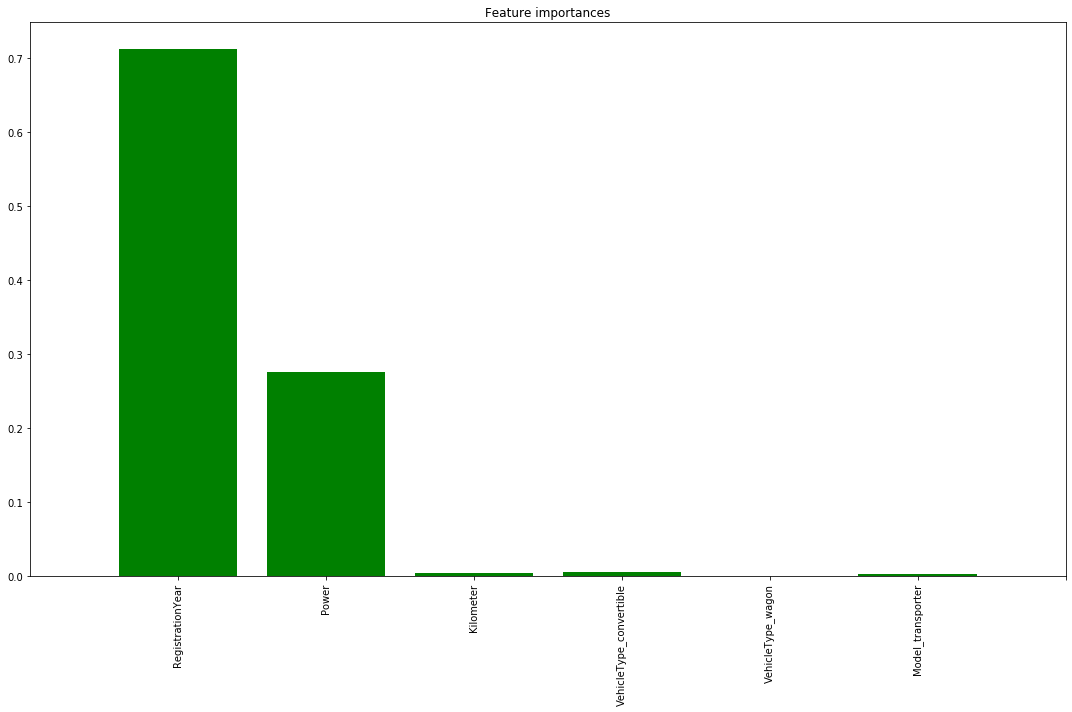

In [117]:
#Строю график важности признаков модели
feature_importance_hist(forest_model, features_train)

In [118]:
%%time
#Обучаю модель
regression_model = LinearRegression()
regression_model.fit(features_train, target_train)
regression_model_predictions = regression_model.predict(features_test)

#Определяю метрику RMSE
regression_RMSE = round(RMSE(target_test, regression_model_predictions), 3)
print('RMSE модели Линейной регрессии:', regression_RMSE)

RMSE модели Линейной регрессии: 2551.59
CPU times: user 22.1 s, sys: 14.4 s, total: 36.5 s
Wall time: 36.6 s


In [119]:
%%time
#Обучаю модель на оптимальных гиперпараметрах
lg_model = lgb.LGBMRegressor(max_depth= lg_params['max_depth'],
                             learning_rate = lg_params['learning_rate'],
                             num_leaves = lg_params['num_leaves'],
                             n_estimators = lg_params['n_estimators'])

lg_model.fit(features_train, target_train)
lg_model_predictions = lg_model.predict(features_test)

#Определяю метрику RMSE
lg_RMSE = round(RMSE(target_test, lg_model_predictions), 3)
print('RMSE модели LGBMRegressor:', lg_RMSE)

RMSE модели LGBMRegressor: 2256.093
CPU times: user 15.6 s, sys: 503 ms, total: 16.1 s
Wall time: 16.3 s


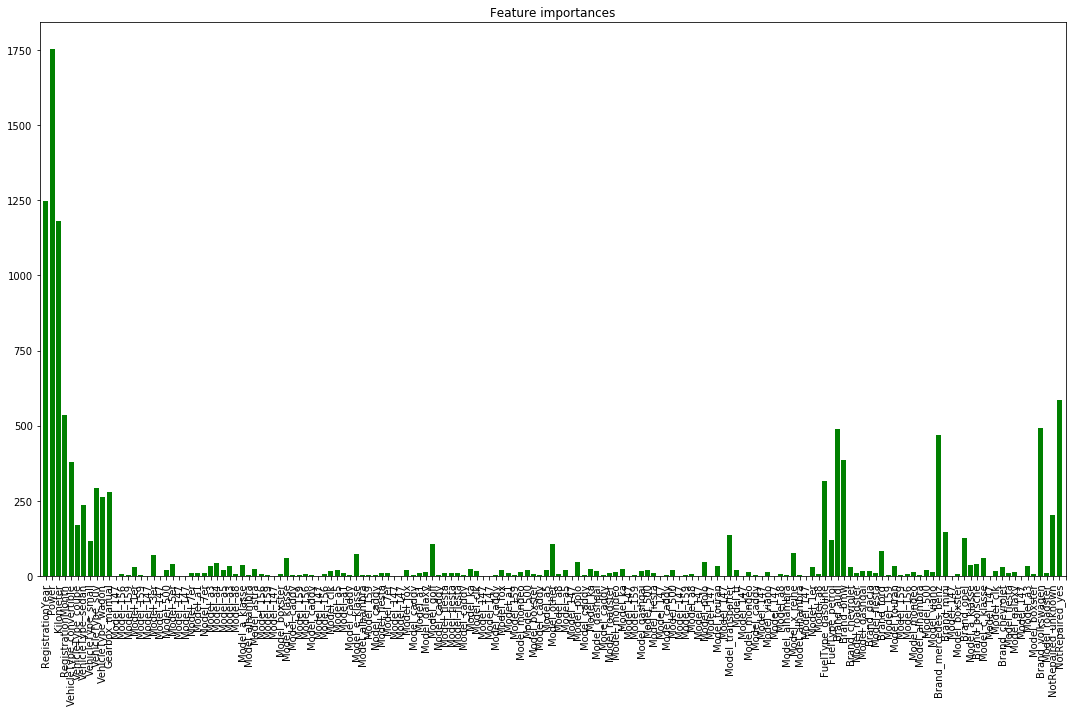

In [120]:
#Строю график важности признаков модели
feature_importance_hist(lg_model, features_train)

In [121]:
%%time
import catboost as cb #Импортирую CatBoost (почему-то без повторного импортирования ячейка не работала)
#Обучаю модель на оптимальных гиперпараметрах
cb_model = cb.CatBoostRegressor(iterations=cb_params['iterations'],
                                learning_rate=cb_params['learning_rate'],
                                depth=cb_params['depth'])

cb_model.fit(features_train, target_train, verbose=10)
cb_model_predictions = cb_model.predict(features_test)

#Определяю метрику RMSE
cb_RMSE = round(RMSE(target_test, cb_model_predictions), 3)
print('RMSE модели CatBoostRegressor:', cb_RMSE)

0:	learn: 4097.8220450	total: 696ms	remaining: 1m 8s
10:	learn: 1999.1067579	total: 8.66s	remaining: 1m 10s
20:	learn: 1707.7936243	total: 16.4s	remaining: 1m 1s
30:	learn: 1641.0354822	total: 24s	remaining: 53.3s
40:	learn: 1603.5246578	total: 31.8s	remaining: 45.8s
50:	learn: 1576.8903817	total: 39.6s	remaining: 38.1s
60:	learn: 1553.8367360	total: 47.7s	remaining: 30.5s
70:	learn: 1533.5153699	total: 55.5s	remaining: 22.7s
80:	learn: 1513.7735234	total: 1m 3s	remaining: 14.9s
90:	learn: 1494.3696691	total: 1m 11s	remaining: 7.09s
99:	learn: 1481.7779136	total: 1m 18s	remaining: 0us
RMSE модели CatBoostRegressor: 1563.182
CPU times: user 1min 16s, sys: 8.24 s, total: 1min 24s
Wall time: 1min 26s


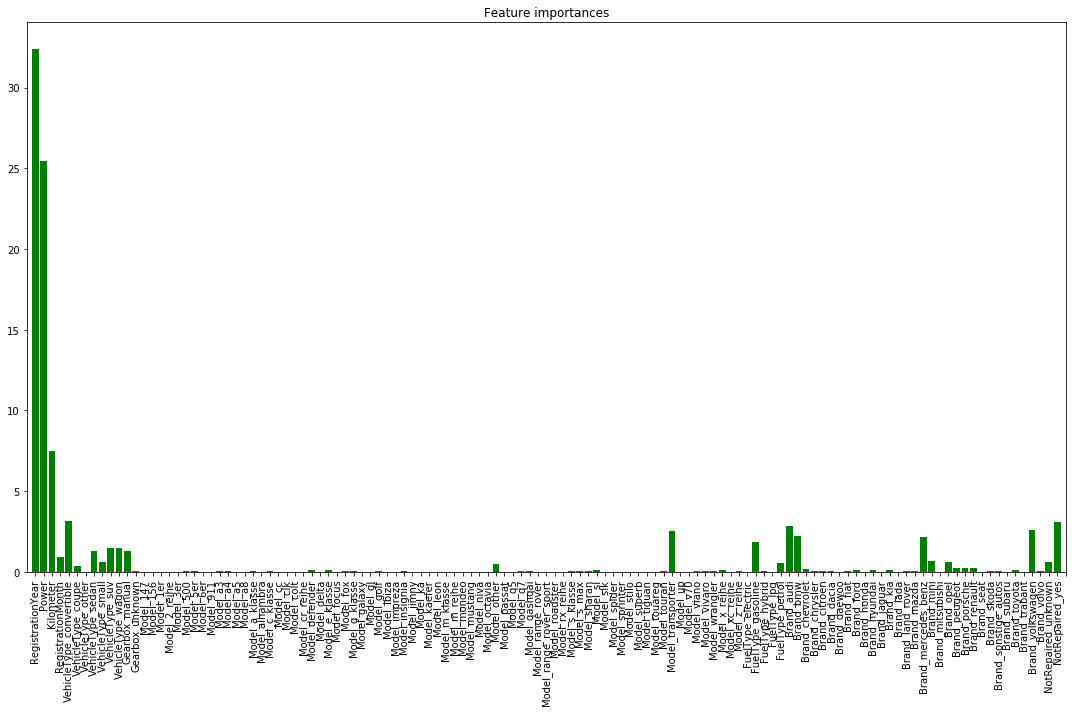

In [122]:
#Строю график важности признаков модели
feature_importance_hist(cb_model, features_train)

In [123]:
%%time
#Для проверки адекватности моделей создаю константную модель
const_model = [target_test.median() for i in range(0, len(target_test))]

#Определяю метрику RMSE константной модели
const_RMSE = round(RMSE(target_test, const_model), 3)
print('RMSE для константной модели', const_RMSE)

RMSE для константной модели 4909.218
CPU times: user 1min 54s, sys: 0 ns, total: 1min 54s
Wall time: 1min 55s


In [125]:
#Создаю итоговую таблицу
columns = ['Модель', 'Время работы модели, сек.', 'RMSE',]
const_model = ['Константная модель', 0, const_RMSE]
forest_model = ['Случайный лес', 22.4, forest_RMSE]
regression_model = ['Линейная регрессия', 36.6, regression_RMSE]
lg_model = ['LGBMRegressor', 16.3, lg_RMSE]
cd_model = ['CatBoostRegressor', 86.0, cb_RMSE]

table = pd.DataFrame([const_model, forest_model, regression_model, lg_model, cd_model], columns = columns)
table['Качество по отношению к константной модели, %'] = round((1-table['RMSE']/const_RMSE) * 100, 2)

display(table)

,Модель,"Время работы модели, сек.",RMSE,"Качество по отношению к константной модели, %"
0,Константная модель,0.0,4909.218,0.00
1,Случайный лес,22.4,2304.059,53.07
2,Линейная регрессия,36.6,2551.590,48.02
3,LGBMRegressor,16.3,2256.093,54.04
4,CatBoostRegressor,86.0,1563.182,68.16


# 4. Общий вывод <a id='step9'></a>

Итак, подведем итоги.
<br>На первом этапе произведена загрузка данных и их подготовка для обучения моделей.
Для анализа данных и построения модели предоставлен датасет, содержащий информацию о технических характеристиках, комплектациях и ценах автомобилей, которые размещались на площадке сервиса «Не бит, не крашен» для продажи. Датасет состоит из 16 столбцов с данными и 354369 строк.
<br>Для обучения моделей требовалась подготовка данных, а именно заполнение пропусков, удаление некоторых аномальных значений, удаление ненужных для обучения моделей столбцов.
<br>В итоге получен датасет, состоящий из 11 столбцов с данными и 353945 строк.

<br>На втором этапе обучены четыре модели. Определены оптимальные гиперпараметры и показатели метрики RMSE на кросс-валидации. В качестве моделей использованы Случайный лес, Линейная регрессия, LGBMRegressor, CatBoostRegressor.

<br>Третий этап позволил произвести анализ качества моделей относительно константной, определены временные рамки работы всех моделей. Для константной модели **RMSE=4909.218**. Наименьший показатель метрики **RMSE=1563.182** достигнут при использовании модели **CatBoostRegressor**, время обучения этой модели составило **1 минута 26 секунд**. Модель **LGBMRegressor** также показала неплохой результат с **RMSE=2256.093**, и временем обучения **16.3 секунды**.

<br>Для работы рекомендуется применять модель на основе **CatBoostRegressor**.